In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load data
df = pd.read_csv('tweets_dataset_ex1.csv', index_col='id', dtype={'id':str})

# Part One: Analysis, and Pre-processing

In [3]:
#Lets see the data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1850 entries, 7.80925634159796e+17 to 6.84216973815845e+17
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   handle                   1850 non-null   object 
 1   text                     1850 non-null   object 
 2   is_retweet               1850 non-null   object 
 3   original_author          234 non-null    object 
 4   time                     1817 non-null   object 
 5   in_reply_to_screen_name  173 non-null    object 
 6   in_reply_to_status_id    137 non-null    object 
 7   in_reply_to_user_id      133 non-null    float64
 8   is_quote_status          1808 non-null   object 
 9   lang                     1845 non-null   object 
 10  retweet_count            1850 non-null   object 
 11  favorite_count           1850 non-null   object 
 12  longitude                47 non-null     float64
 13  latitude                 9 non-null      

We can see that there are many columns with missing data. (missing more then 50%)

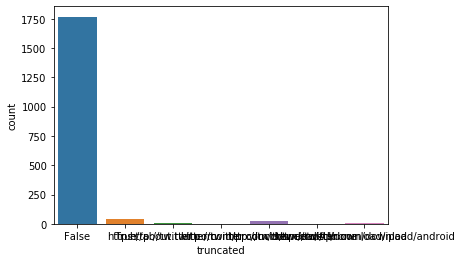

In [4]:
sns.countplot(x="truncated", data=df)

As we can see almost all values are 'False' at 'truncated' column.

In [5]:
#Lets remove columns with large number of missing and not 'informative' data.
df = df.drop(columns=['longitude', 'latitude', 'place_id','in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box','original_author','truncated','extended_entities'])

In [6]:
#Show how data looks
df.head(2)

,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,source_url,entities,Unnamed: 28
id,,,,,,,,,,,
7.809256e+17,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28T00:22:34,False,en,218,651,https://studio.twitter.com,{'media': [{'display_url': 'pic.twitter.com/Xr...,NaN
7.809162e+17,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,False,en,2445,5308,http://twitter.com,{'media': [{'display_url': 'pic.twitter.com/t0...,NaN


In [7]:
#Analyse columns
def analyze_column(col):
    print("Number of unique values {0}".format(col.nunique()))
    print("Unique values are: {0}".format(col.unique()))
    print("\n")
    
analyze_column(df.handle)
analyze_column(df.lang)
analyze_column(df.source_url)

Number of unique values 2
Unique values are: ['HillaryClinton' 'realDonaldTrump']


Number of unique values 7
Unique values are: ['en' 'es' 'False' 'und' 'fr' nan 'True' 'da']


Number of unique values 10
Unique values are: ['https://studio.twitter.com' 'http://twitter.com'
 'https://about.twitter.com/products/tweetdeck'
 'http://twitter.com/download/iphone'
 'http://twitter.com/download/android' nan
 'http://twitter.com/#!/download/ipad'
 "BoundingBox(type='Polygon', coordinates=[[[-81.885646, 41.386334], [-81.780301, 41.386334], [-81.780301, 41.42068], [-81.885646, 41.42068]]], _api=<tweepy.api.API object at 0x7f013ae30588>)"
 'https://mobile.twitter.com'
 "BoundingBox(type='Polygon', coordinates=[[[-96.6396669, 40.375437], [-90.140061, 40.375437], [-90.140061, 43.50102], [-96.6396669, 43.50102]]], _api=<tweepy.api.API object at 0x7f013ae30588>)"
 "BoundingBox(type='Polygon', coordinates=[[[-79.487651, 37.886607], [-74.986286, 37.886607], [-74.986286, 39.723622], [-79.487651, 39.7236

As we can see there are there are: 2 Users (as expected); 7 different languages which features can  mislead us; 10 different sources used

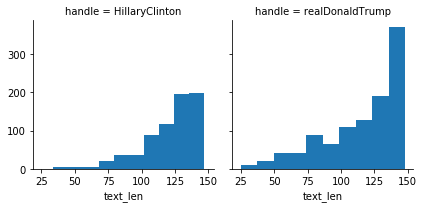

In [8]:
#remove all non english rows
df = df[df.lang=='en']

#Get the length of the tweets
df['text_len'] = df.text.apply(len)

#plot the histogram of the text length
grid = sns.FacetGrid(df,col='handle')
grid.map(plt.hist,'text_len')

From the histogram of textual data length we can see thet Trumps tweets longer then Hillaries.

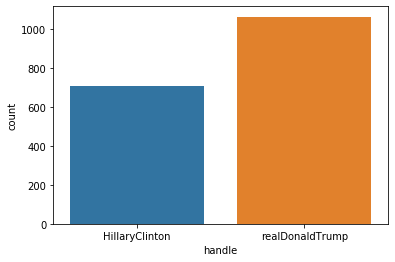

In [9]:
#number of tweets by 'handle'
sns.countplot(x="handle", data=df)

The data isn't very balanced, but accuracy paradox shouldn't be an issue. 

In [10]:
#Lets see our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1768 entries, 7.80925634159796e+17 to 6.84216973815845e+17
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   handle           1768 non-null   object
 1   text             1768 non-null   object
 2   is_retweet       1768 non-null   object
 3   time             1768 non-null   object
 4   is_quote_status  1768 non-null   object
 5   lang             1768 non-null   object
 6   retweet_count    1768 non-null   object
 7   favorite_count   1768 non-null   object
 8   source_url       1768 non-null   object
 9   entities         1768 non-null   object
 10  Unnamed: 28      0 non-null      object
 11  text_len         1768 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 259.6+ KB


In [11]:
#set id's to categorical features and target
df['hand_id'] = pd.get_dummies(data=df.handle,drop_first = True)['realDonaldTrump']
id_lst = range(0, df.source_url.nunique())
df_tmp = pd.DataFrame({'source_url': df.source_url.unique(), 'source_id' : id_lst})
df_final = pd.merge(df, df_tmp, how='left', on=['source_url'])

# del df, df_tmp

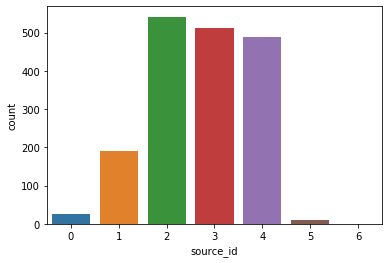

In [12]:
sns.countplot(x="source_id", data=df_final)

Now we have 5 different sources

In [13]:
df_tmp

,source_url,source_id
0,https://studio.twitter.com,0
1,http://twitter.com,1
2,https://about.twitter.com/products/tweetdeck,2
3,http://twitter.com/download/iphone,3
4,http://twitter.com/download/android,4
5,http://twitter.com/#!/download/ipad,5
6,https://mobile.twitter.com,6


The 'source url' field show us that there are defferent sources of tweets. (iphone, ipad, android, api, mobile) 

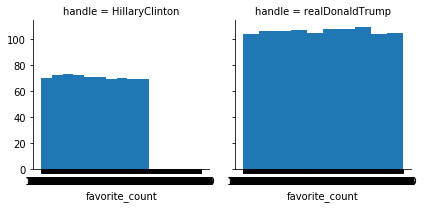

In [14]:
#plot the histogram of the text length
grid = sns.FacetGrid(df_final,col='handle')
grid.map(plt.hist,'favorite_count')

From the diagram abouve we can see that favorit_count is higher at Trumps tweets

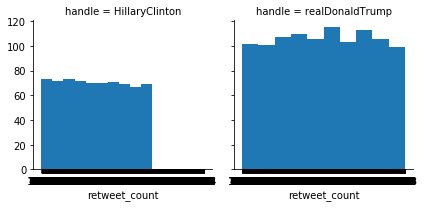

In [15]:
#plot the histogram of the text length
grid = sns.FacetGrid(df_final,col='handle')
grid.map(plt.hist,'retweet_count')

From the diagram abouve we can see that retweeet_count is higher at Trumps tweets

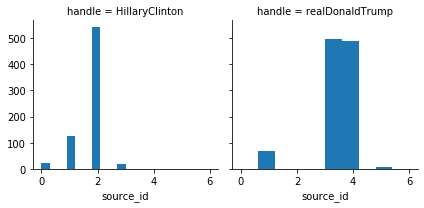

In [16]:
#plot the histogram of the text length
grid = sns.FacetGrid(df_final,col='handle')
grid.map(plt.hist,'source_id')

We can see that Trump tweets coming from android and Hoillary from tweetdeck

# Models

In [17]:
import numpy as np
import xgboost

import scikitplot as skplt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
import tensorflow_hub as hub

Since your data is limited, the classifier should be selected correspondly. 
Therefore I tried : MultinomialNB and two boosting methods Adaboost and xGboost. Boosting methods can deal better
with limmited data since they reduce bias by training the subsequent model by telling him what errors the previous models made (the boosting part)

In [18]:
#Recieve real and predicted data, returm all classification metrics 
def get_report(real_data, predicted):
    conf_mat = confusion_matrix(real_data, predicted)
    class_report = classification_report(real_data, predicted)
    accuracy = accuracy_score(y_test, predictions)
    
    return conf_mat, class_report, accuracy

In [28]:
#Draw confusion matrix
def plot_confusion(real_data, predicted):
    skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)
    plt.show()

#Plot precision recall curve
def plot_precision_recall(real_data, predicted):
    x = np.column_stack((1-predicted, predicted))
    skplt.metrics.plot_precision_recall_curve(y_test, x)
    plt.show()
    
#Plot ROC curve
def plot_roc(real_data, predicted):
    x = np.column_stack((1-predicted, predicted))
    skplt.metrics.plot_roc_curve(y_test, x)
    plt.show()

In [20]:
col_names = ['retweet_count', 'favorite_count', 'text_len', 'source_id']
col_to_scal = ['retweet_count', 'favorite_count', 'text_len']

def process_features(data):
    features = df_final[col_names]
    ct = ColumnTransformer([('exOne', MinMaxScaler(), col_to_scal)], remainder='passthrough')
    
    return ct.fit_transform(features)



module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #"https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model_uge = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
    return model_uge(input)

def get_textual_feat(data):
    txt_lst = data.text.tolist()
    embed_lst = embed(txt_lst)
    embed_data = np.array(embed_lst)
    scaler = MinMaxScaler()
    scaler.fit(embed_data)
    
    return scaler.transform(embed_data[::1])

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


# Lets begin without textual features:

In [21]:
in_data = process_features(df_final)
target = np.array(df_final.hand_id.tolist())

X_train, X_test, y_train, y_test = train_test_split(in_data, target,test_size=0.2,random_state=101)

The best model for that task is xgboost, since it an ensamble method it uses many trees with the same data.
In our case, we have small dataset.

In [22]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 94.63% 

confusion matrix

[[131  14]
 [  5 204]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       145
           1       0.94      0.98      0.96       209

    accuracy                           0.95       354
   macro avg       0.95      0.94      0.94       354
weighted avg       0.95      0.95      0.95       354



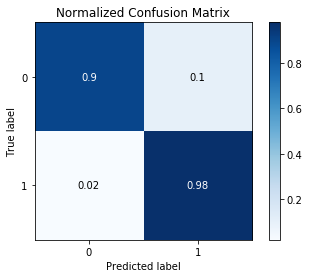

In [24]:
plot_confusion(y_test, predictions)

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


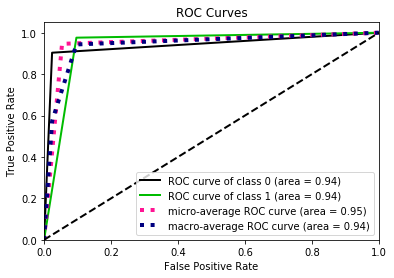

In [27]:
plot_roc(y_test, predictions)

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


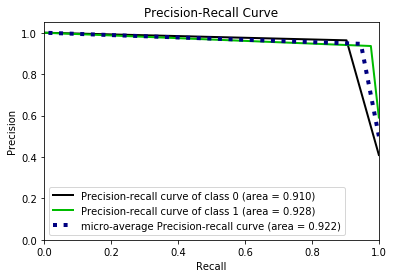

In [29]:
plot_precision_recall(y_test, predictions)

# Now lets use only Textual features

In [25]:
tin_data = get_textual_feat(df_final)
X_train, X_test, y_train, y_test = train_test_split(tin_data, target,test_size=0.2,random_state=101)

In [26]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [28]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 85.03% 

confusion matrix

[[113  32]
 [ 21 188]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       145
           1       0.85      0.90      0.88       209

    accuracy                           0.85       354
   macro avg       0.85      0.84      0.84       354
weighted avg       0.85      0.85      0.85       354



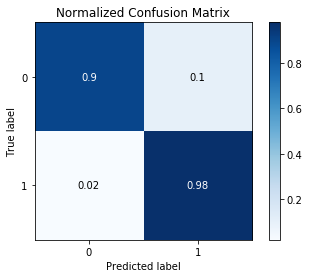

In [32]:
plot_confusion(y_test, predictions)

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


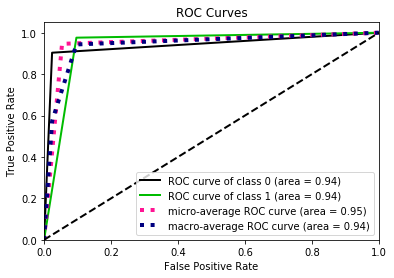

In [33]:
plot_roc(y_test, predictions)

# All features 

In [29]:
all_data = np.concatenate((in_data, tin_data), axis=1)
X_train, X_test, y_train, y_test = train_test_split(all_data, target,test_size=0.2,random_state=101)

In [30]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
conf_mat, class_report, accuracy = get_report(y_test, predictions)

print("Accuracy: %.2f%% \n" % (accuracy * 100.0))
print('confusion matrix\n')
print(conf_mat)
print(class_report)

Accuracy: 95.48% 

confusion matrix

[[137   8]
 [  8 201]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       145
           1       0.96      0.96      0.96       209

    accuracy                           0.95       354
   macro avg       0.95      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354



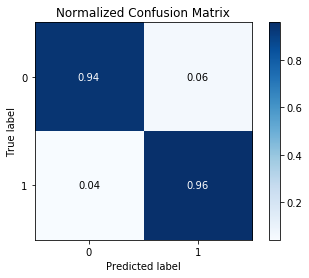

In [32]:
plot_confusion(y_test, predictions)

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


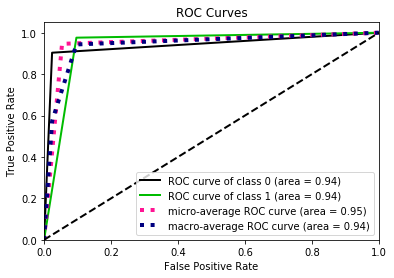

In [30]:
plot_roc(y_test, predictions)

/home/slavik/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


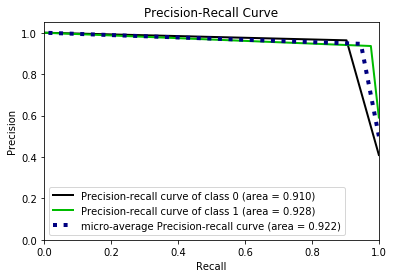

In [31]:
plot_precision_recall(y_test, predictions)

# Winning model with 95.48% accuracy!!!